<a href="https://colab.research.google.com/github/Umutyagizyerli/kvasir-classification/blob/main/KVASIR_Own_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns


In [ ]:
train_dataAugmentation = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    shear_range=0.3,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    )

In [ ]:
test_dataAugmentation = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_dataAugmentation.flow_from_directory('Desktop/kvasir-dataset-v2/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 6400 images belonging to 8 classes.


In [ ]:
test_generator =test_dataAugmentation.flow_from_directory('Desktop/kvasir-dataset-v2/test',
                                        target_size=(224,224),
                                        batch_size=50,
                                        color_mode='rgb',
                                        shuffle=False,
                                        class_mode='categorical')


Found 1600 images belonging to 8 classes.


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(8,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        3

In [ ]:
history = model.fit (train_generator,
                               steps_per_epoch=(train_generator.n//train_generator.batch_size//2),
                               validation_data=test_generator,
                               validation_steps=test_generator.n//test_generator.batch_size//2,
                               epochs=50,
                               callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                               ModelCheckpoint(filepath='last_model.h5', monitor='val_loss', save_best_only=True)]
)

Epoch 1/50
100/100 [==============================] - 172s 2s/step - loss: 1.0438 - accuracy: 0.5572 - val_loss: 7.9513 - val_accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 189s 2s/step - loss: 0.8829 - accuracy: 0.6041 - val_loss: 10.4073 - val_accuracy: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 167s 2s/step - loss: 0.8336 - accuracy: 0.6181 - val_loss: 3.8312 - val_accuracy: 0.1388
Epoch 4/50
100/100 [==============================] - 170s 2s/step - loss: 0.7453 - accuracy: 0.6572 - val_loss: 1.5674 - val_accuracy: 0.4850
Epoch 5/50
100/100 [==============================] - 170s 2s/step - loss: 0.7447 - accuracy: 0.6584 - val_loss: 0.9332 - val_accuracy: 0.5788
Epoch 6/50
100/100 [==============================] - 164s 2s/step - loss: 0.7526 - accuracy: 0.6484 - val_loss: 0.7302 - val_accuracy: 0.6725
Epoch 7/50
100/100 [==============================] - 161s 2s/step - loss: 0.7136 - accuracy: 0.6612 - val_loss: 1.9520 - val_accurac

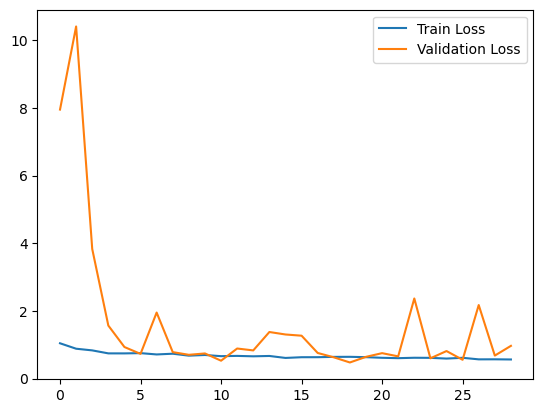

<function matplotlib.pyplot.show(close=None, block=None)>

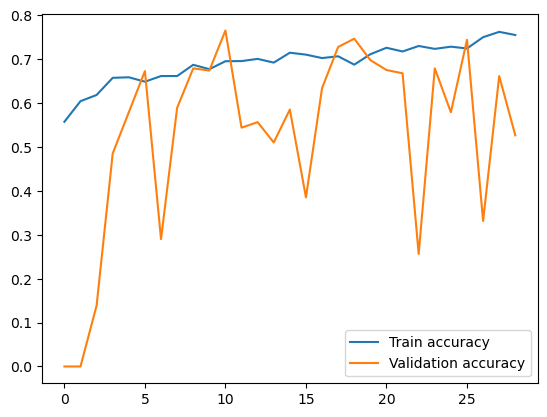

In [ ]:
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"],label="Train accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show

In [ ]:
import json
with open ("kvasır_cnn_hist.json","w") as f:
    json.dump(history.history,f)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

32/32 [==============================] - 32s 995ms/step - loss: 0.9470 - accuracy: 0.5606
Test Loss: 0.9470477104187012
Test Accuracy: 0.5606250166893005


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print('Classification Report:')
print(report)

Classification Report:
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.21      0.03      0.05       200
dyed-resection-margins       0.47      0.99      0.64       200
           esophagitis       0.60      0.81      0.69       200
          normal-cecum       0.92      0.28      0.42       200
        normal-pylorus       0.74      0.83      0.78       200
         normal-z-line       0.60      0.33      0.42       200
                polyps       0.42      0.89      0.57       200
    ulcerative-colitis       0.93      0.34      0.49       200

              accuracy                           0.56      1600
             macro avg       0.61      0.56      0.51      1600
          weighted avg       0.61      0.56      0.51      1600



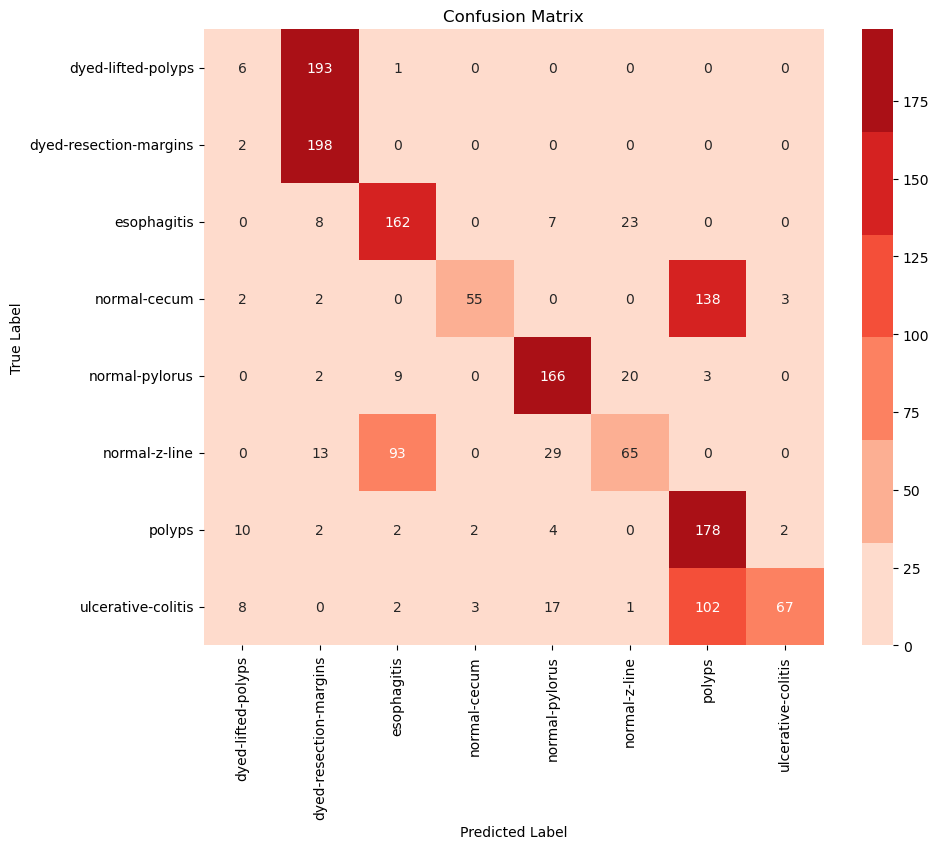

In [ ]:
test_generator.reset()

predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

cmap = sns.color_palette("Reds")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()